In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('HR.csv')

In [9]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
statistics = df_numeric.describe()
mode_series = df_numeric.mode().iloc[0]
mode_df = pd.DataFrame(mode_series).transpose().rename(index={0: 'mode'})
statistics = pd.concat([statistics, mode_df])

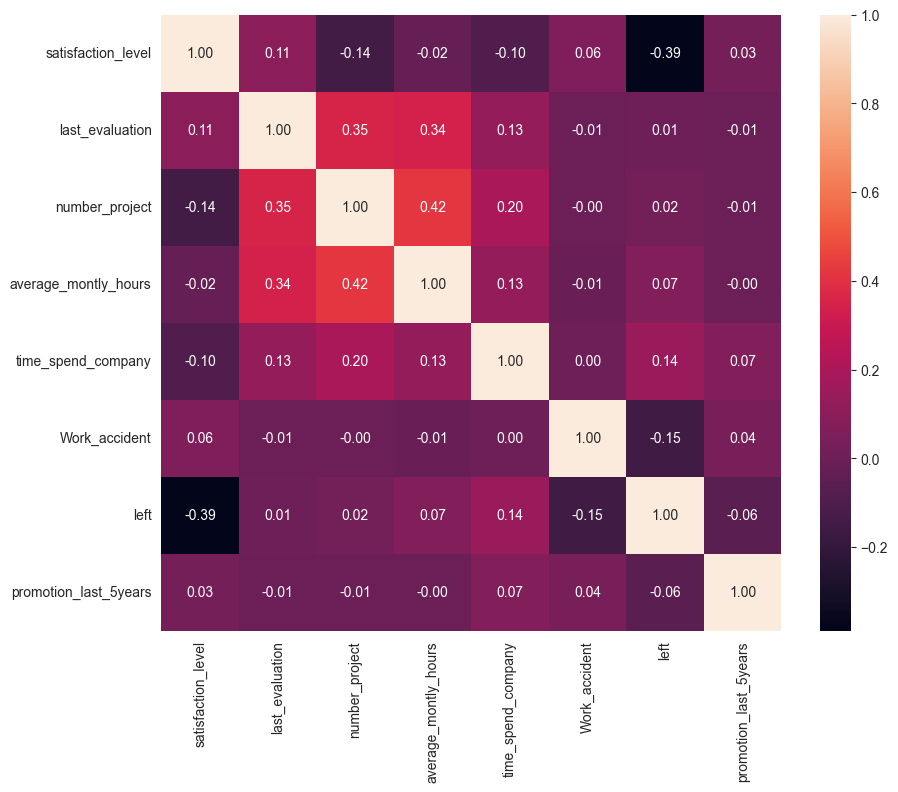

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [11]:
corr_matrix_unstacked = corr_matrix.unstack()
sorted_pairs = corr_matrix_unstacked.sort_values(kind="quicksort", ascending=False)
print(sorted_pairs[sorted_pairs != 1].drop_duplicates().head(2))
print(sorted_pairs[sorted_pairs != 1].drop_duplicates().tail(2))

number_project   average_montly_hours    0.417211
last_evaluation  number_project          0.349333
dtype: float64
left  Work_accident        -0.154622
      satisfaction_level   -0.388375
dtype: float64


In [12]:
count_department = df['department'].value_counts()

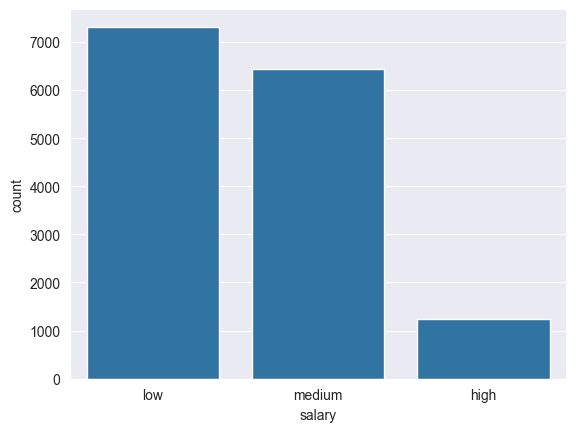

In [13]:
salary_distribution = df['salary'].value_counts()
sns.countplot(x='salary', data=df)
plt.show()

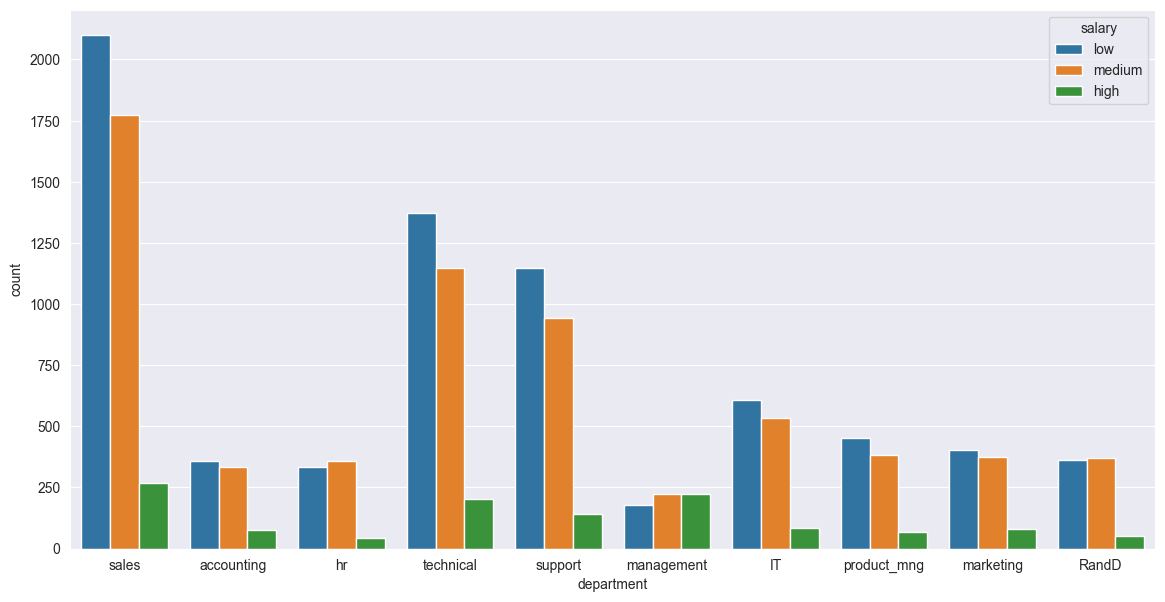

In [14]:
plt.figure(figsize=(14, 7))
sns.countplot(x='department', hue='salary', data=df)
plt.show()

In [15]:
hours_high = df[df['salary'] == 'high']['average_montly_hours']
hours_low = df[df['salary'] == 'low']['average_montly_hours']
t, p_value = stats.ttest_ind(hours_high, hours_low)
print('t-значение:', t, 'p-значение:', p_value)

t-значение: -0.7288680398062308 p-значение: 0.4661023478267259


In [16]:
left_grouped = df.groupby('left').agg({
    'promotion_last_5years': lambda x: (x == 1).mean(),
    'satisfaction_level': 'mean',
    'number_project': 'mean'
})

In [17]:
X = df.drop(['left', 'department', 'salary'], axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [19]:
y_pred = lda_model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print('Точность модели LDA:', accuracy)

Точность модели LDA: 0.7533333333333333
